In [5]:
# Question 1
# Data Exploration

import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\Sharon\Downloads\Employee.csv")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Feature '{column}' has {len(unique_values)} unique values: {unique_values}")


Feature 'Company' has 7 unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Feature 'Age' has 30 unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Feature 'Salary' has 41 unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Feature 'Place' has 12 unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Feature 'Country' has 1 unique values: ['India']
Feature 'Gender' has 2 unique values: [0 1]


In [7]:
# Statistical Analysis
statistics = data.describe()
print(statistics)


              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [9]:
# Renaming Columns
data.rename(columns={
    'old_column_name': 'new_column_name',  # Replace with actual column names
    'another_old_name': 'another_new_name'
}, inplace=True)

print(data.columns)  # Check renamed columns




Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [11]:
# Question 2 
# Data Cleaning
# Find missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [16]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify the changes
print("Number of rows after removing duplicates:", len(data))
print(data)


Number of rows after removing duplicates: 144
             Company   Age  Salary     Place Country  Gender
0                TCS  20.0     NaN   Chennai   India       0
1            Infosys  30.0     NaN    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[144 rows x 6 columns]


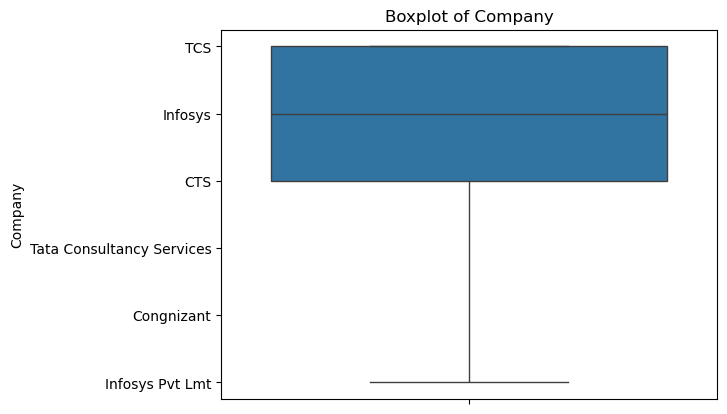

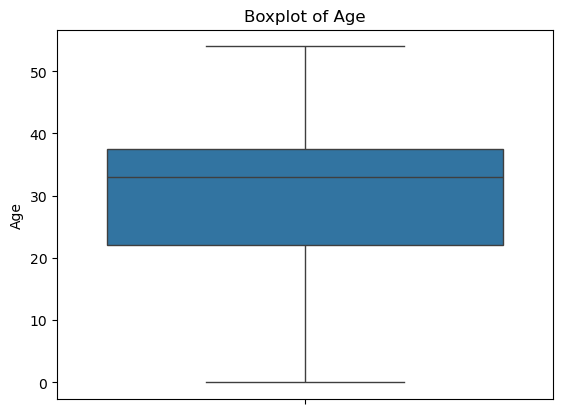

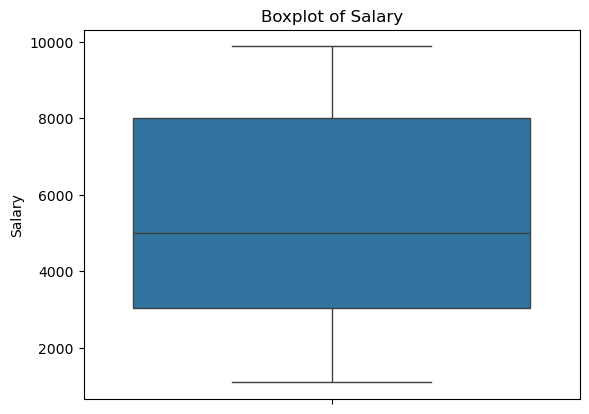

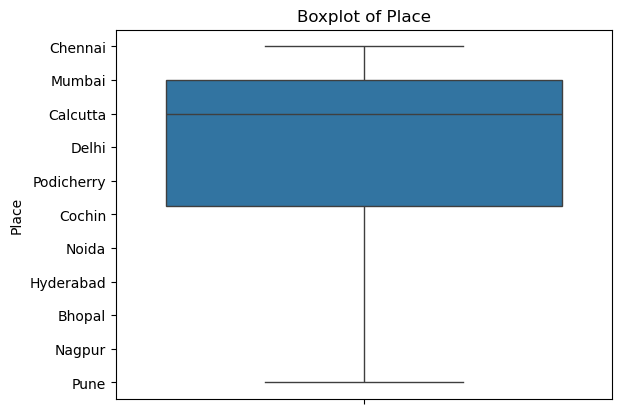

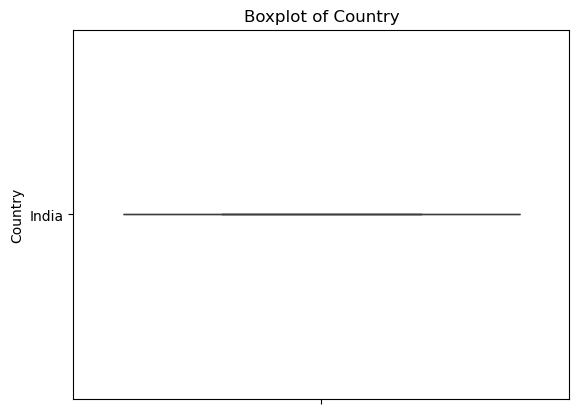

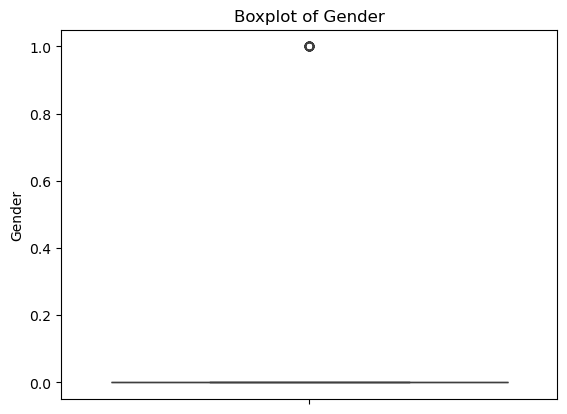

In [18]:
# Find the outliers.
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for outlier detection
for column in data.columns:
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


In [22]:
# Replace the value 0 in age as NaN
data['Age'] = data['Age'].replace(0, np.nan)

# Verify the changes
print(data['Age'])

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: Age, Length: 144, dtype: float64


In [32]:
# Question 3
# Data Analysis
# Filter the data with age >40 and salary<5000
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
print(filtered_data)


     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


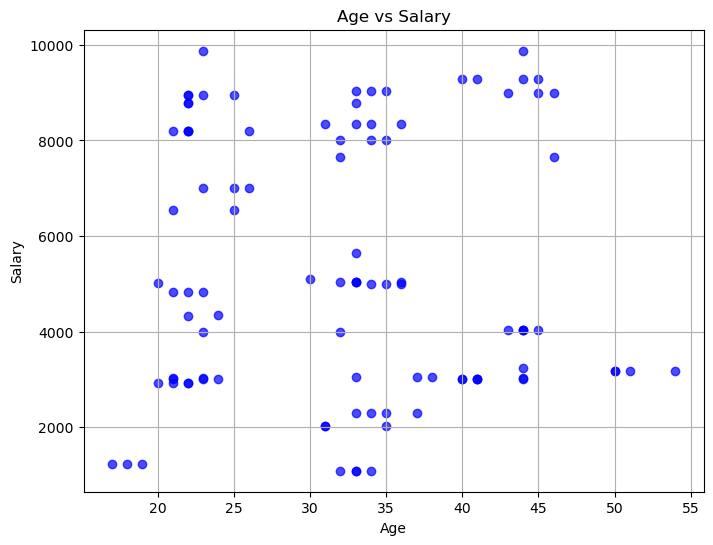

In [36]:
# Plot the chart with age and salary
import matplotlib.pyplot as plt

# Scatter plot for Age vs Salary
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Salary'], color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')

# Display the plot
plt.grid(True)
plt.show()


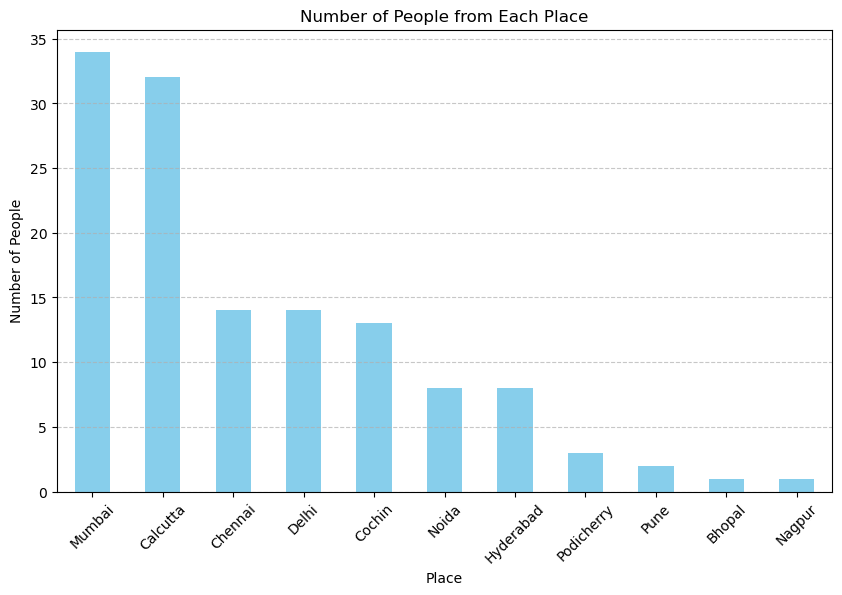

In [40]:
# Count the number of people from each place and represent it visually
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of people from each place
place_counts = data['Place'].value_counts()

# Visualize the data using a bar chart
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Place')
plt.ylabel('Number of People')
plt.title('Number of People from Each Place')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [50]:
# Question 3 
# Data Encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'category_column'
data['category_column_encoded'] = label_encoder.fit_transform(data['Gender'])

print(data[['Gender', 'category_column_encoded']])


     Gender  category_column_encoded
0         0                        0
1         0                        0
2         0                        0
3         0                        0
4         0                        0
..      ...                      ...
142       0                        0
143       1                        1
145       1                        1
146       1                        1
147       0                        0

[144 rows x 2 columns]


In [46]:
print(data.columns)


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [52]:
# Question 4
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Apply StandardScaler to numerical features
scaled_data_standard = standard_scaler.fit_transform(data[['Gender', 'category_column_encoded']])  # Replace with your actual feature names

# Convert scaled data back to DataFrame for readability
scaled_data_standard_df = pd.DataFrame(scaled_data_standard, columns=['feature_1_scaled', 'feature_2_scaled'])
data = pd.concat([data, scaled_data_standard_df], axis=1)

print(scaled_data_standard_df.head())


   feature_1_scaled  feature_2_scaled
0         -0.534522         -0.534522
1         -0.534522         -0.534522
2         -0.534522         -0.534522
3         -0.534522         -0.534522
4         -0.534522         -0.534522


In [54]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply MinMaxScaler to numerical features
scaled_data_minmax = minmax_scaler.fit_transform(data[['Gender', 'category_column_encoded']])  # Replace with your actual feature names

# Convert scaled data back to DataFrame for readability
scaled_data_minmax_df = pd.DataFrame(scaled_data_minmax, columns=['feature_1_scaled_minmax', 'feature_2_scaled_minmax'])
data = pd.concat([data, scaled_data_minmax_df], axis=1)

print(scaled_data_minmax_df.head())


   feature_1_scaled_minmax  feature_2_scaled_minmax
0                      0.0                      0.0
1                      0.0                      0.0
2                      0.0                      0.0
3                      0.0                      0.0
4                      0.0                      0.0
